Códigos apresentados no vídeo [Análise exploratória de dados em python: pandas, google colab, gráficos com matplotlib e seaborn](https://youtu.be/woObL4Mx9ns)

# Análise exploratória de dados

**Passo 1**: Entendimento dos dados

- visão geral dos dados (*shape*, *head*, *tail*, *sample*, *dtypes*)
- resumo estatístico: *describe*

**Passo 2**: Limpeza e organização dos dados

- Apagar colunas e linhas desnecessárias (*drop*)
- Identificar colunas duplicadas
- Corrigir valores, nomes etc.
- Renomear colunas
- Criar novas colunas

**Passo 3**: Gráficos para entender as variáveis

- Variáveis quantitativas: histogramas, KDE, *boxplots*
- Variáveis qualitativas: gráficos de colunas, de barras, linhas, pizza

**Passo 4**: Relação entre variáveis

- Diagramas de dispersão
- Mapas de calor (*heatmaps*)
- Agrupamento dos dados: *groupby*

**Passo 5**: Elaborar uma questão sobre os dados

Tentar responder uma questão sobre os dados usando um gráfico ou estatística.


Importar pacotes necessários:

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
pd.set_option('display.max_columns', 50)             # permite a visualização de 50 colunas do dataframe
pd.options.display.float_format = '{:.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais

# parte gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# Criação dos dados - ATENÇÃO!

NÃO É necessário executar os códigos da célula abaixo se os dados de 2021 (ou outro ano) já estão salvos. Pule para a leitura dos dados.

A célula abaixo realiza todos os passos necessários para carregar os dados de seguro rural de 2016 a 2021, limpar, organizar, separar os dados de 2021 e salvar a planilha.

Tarefa feita no notebook de limpeza e organização: https://colab.research.google.com/drive/1YG5gjUd_U4DTcCLT1nWnvxXCBRylLn0G?authuser=1

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dados')
# tire o comentário se quiser executar
dados = pd.read_excel("psrdadosabertos2016a2021excel.xlsx", decimal=',')

# seleção de dados
dados21 = dados[dados['ANO_APOLICE'] == 2021]
seg = dados21.copy()
seg = seg.reset_index(drop=True)
# limpeza e organização
seg = seg.fillna(0)
df = seg.replace(['-', '...', 'X'], 0)
df.dropna(inplace=True, how='all')
df.dropna(inplace=True)
# criação de nova coluna
df['DT_FIM_VIGENCIA'] = pd.to_datetime(df['DT_FIM_VIGENCIA'], errors = 'coerce')
df['duracao'] = (df['DT_FIM_VIGENCIA'] - df['DT_INICIO_VIGENCIA']).dt.days
df.dropna(inplace=True)
# apagar colunas sem interesse
retirar = ['CD_PROCESSO_SUSEP', 'NR_PROPOSTA', 'ID_PROPOSTA',
       'DT_PROPOSTA', 'DT_INICIO_VIGENCIA', 'DT_FIM_VIGENCIA', 'NM_SEGURADO',
       'NR_DOCUMENTO_SEGURADO','LATITUDE', 'NR_GRAU_LAT', 'NR_MIN_LAT',
       'NR_SEG_LAT', 'LONGITUDE', 'NR_GRAU_LONG', 'NR_MIN_LONG', 'NR_SEG_LONG',
       'NR_DECIMAL_LATITUDE', 'NR_DECIMAL_LONGITUDE', 'DT_APOLICE', 'ANO_APOLICE']
df = df.drop(retirar, axis=1)
# corrigir strings
df['EVENTO_PREPONDERANTE'] = df['EVENTO_PREPONDERANTE'].str.split().str.join(' ')
df['EVENTO_PREPONDERANTE'] = df['EVENTO_PREPONDERANTE'].replace([np.NaN], '0')
df['NM_RAZAO_SOCIAL'] = df['NM_RAZAO_SOCIAL'].str.strip()
df['NM_CULTURA_GLOBAL'] = df['NM_CULTURA_GLOBAL'].str.strip()
# mudar nomes de colunas
df.columns = ['seguradora', 'nome_mun', 'uf',
              'tipo', 'cultura', 'area', 'animal',
              'prod_est', 'prod_seg', 'nivel_cob',
              'total_seg', 'premio', 'taxa',
              'subvencao', 'apolice', 'mun', 'indenizacao',
              'evento', 'duracao']
df['mun'] = df['mun'].astype(int)
# criar outras colunas
df['sinistralidade'] = df['indenizacao'] / df['premio']
df['sinistro'] = np.where(df['evento'].str.isnumeric(), 0, 1)
# organizar colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg',
                'premio', 'taxa', 'subvencao', 'indenizacao',
                'evento', 'sinistro', 'sinistralidade']]

# salvar novos dados
# tire o comentário se quiser salvar
# df.to_excel("seguro-rural-2021.xlsx", index=False)

# Leitura dos dados

Lendo a partir do *google drive*.

In [ ]:
# demora um pouco
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dados')
df = pd.read_excel("seguro-rural-2021.xlsx")

Mounted at /content/drive


In [ ]:
# número de linhas (observações) e colunas (variáveis)
df.shape

(212838, 21)

# Passos 1 e 2: Entendimento e organização dos dados

Já fizemos a maior parte dessas tarefas antes.

In [ ]:
# visualizar primeiras linhas
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,10001010026768,5218805,Rio Verde,GO,Newe Seguros S.A,CUSTEIO,Milho 2ª safra,62.00,0,181,6171.60,4011.60,0.65,133064.77,7895.27,0.06,3158.11,17583.39,SECA,1,2.23
1,494404,5211909,Jataí,GO,BRASILSEG COMPANHIA DE SEGUROS,CUSTEIO,Milho 2ª safra,268.00,0,365,6013.00,3908.45,0.65,608223.32,33452.28,0.05,13380.91,0.00,0,0,0.00
2,4525000065701,5107859,São Félix do Araguaia,MT,Mapfre Seguros Gerais S.A.,PRODUTIVIDADE,Milho 2ª safra,850.00,0,244,6276.00,4079.40,0.65,2311660.00,195224.61,0.08,48000.00,0.00,0,0,0.00
3,1000100040113,4107306,Doutor Camargo,PR,FairFax Brasil Seguros Corporativos S/A,PRODUTIVIDADE,Milho 2ª safra,15.73,0,278,5569.80,3620.40,0.65,47457.41,5277.26,0.11,2110.90,16413.80,SECA,1,3.11
4,1000111016260,4126009,São Sebastião da Amoreira,PR,Too Seguros S.A.,PRODUTIVIDADE,Milho 2ª safra,124.97,0,180,5226.00,3658.20,0.70,304776.84,43755.91,0.14,17502.36,248902.36,SECA,1,5.69


In [ ]:
# df.dtypes

In [ ]:
# resumo estatístico apenas das variáveis que interessam
df.iloc[:, 5:].describe()

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
count,212838.00,212838.00,212838.00,212838.00,212838.00,212838.00,212838.00,212838.00,212838.00,212838.00,212838.00,212838.00,212838.00
mean,64.30,0.57,296.29,12965.95,11758.39,0.67,312462.07,19397.01,0.08,5416.16,45957.69,0.52,2.55
std,672.28,25.32,77.16,471611.30,471606.12,0.21,1374674.07,27293.33,0.04,6703.21,125668.15,0.50,4.25
min,0.00,0.00,30.00,0.00,0.00,0.00,753.48,55.34,0.00,0.01,0.00,0.00,0.00
25%,12.42,0.00,227.00,3000.00,2047.50,0.65,71916.54,4960.00,0.05,1499.84,0.00,0.00,0.00
50%,30.00,0.00,321.00,3651.60,2542.00,0.70,150027.07,10239.67,0.07,3147.73,0.00,1.00,0.00
75%,71.80,0.00,365.00,5500.00,3720.60,0.70,338109.44,22598.41,0.10,6540.63,40373.68,1.00,4.49
max,290985.00,6200.00,3658.00,80000000.00,80000000.00,1.00,520323520.32,893218.14,1.00,48000.00,6407193.25,1.00,203.98


Há valores faltantes?

In [ ]:
df.isna().sum()

,0
apolice,0
mun,0
nome_mun,0
uf,0
seguradora,0
tipo,0
cultura,0
area,0
animal,0
duracao,0


In [ ]:
# se tivessem valores faltantes poderíamos tirar as linhas
# df = df.dropna()

Há dados duplicados?

In [ ]:
df.loc[df.duplicated()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade


In [ ]:
df.loc[df.duplicated(subset=['apolice'])]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade


Não há nesse caso.

In [ ]:
# se quisermos tirar linhas duplicadas
# e é possível escolher as colunas a serem consideradas

# df = df.loc[~df.duplicated(subset=['apolice'])] \
# .reset_index(drop=True).copy()

In [ ]:
# número de valores únicos no dataframe para cada coluna:
# df.nunique()

In [ ]:
# ocorrências únicas de uma variável
df['evento'].unique()

array(['seca', 'nenhum', 'geada', 'granizo', 'vento', 'chuva', 'incêndio',
       'outras', 'temp.', 'raio', 'morte', 'inundação', 'var. preço',
       'pragas', 'queda parr.', 'perda qual.', 'replantio'], dtype=object)

Para melhorar a visualização dos eventos e tipo de seguro vamos subtituir os eventos por outros nomes.
Obs.: *inplace=True* faz com que a modificação seja feita e salva no *dataframe*.

In [ ]:
df['evento'].replace({'0':'nenhum',
                      'SECA': 'seca',
                      'GEADA': 'geada',
                      'CHUVA EXCESSIVA': 'chuva',
                      'DOENÇAS E PRAGAS': 'pragas',
                      'GRANIZO': 'granizo',
                      'VENTOS FORTES/FRIOS': 'vento',
                      'INUNDAÇÃO/TROMBA D´ÁGUA': 'inundação',
                      'VARIAÇÃO EXCESSIVA DE TEMPERATURA': 'temp.',
                      'INCÊNDIO': 'incêndio',
                      'DEMAIS CAUSAS': 'outras',
                      'VARIAÇÃO DE PREÇO': 'var. preço',
                      'REPLANTIO': 'replantio',
                      'RAIO': 'raio',
                      'MORTE': 'morte',
                      'QUEDA DE PARREIRAL': 'queda parr.',
                      'PERDA DE QUALIDADE': 'perda qual.'}, inplace=True)

In [ ]:
# ocorrências únicas
df['tipo'].unique()

array(['CUSTEIO', 'PRODUTIVIDADE', 'PECUÁRIO', 'FLORESTAS'], dtype=object)

In [ ]:
df['tipo'].replace({'CUSTEIO': 'custeio',
                    'PRODUTIVIDADE': 'produtividade',
                    'FLORESTAS': 'florestas',
                    'PECUÁRIO': 'pecuário',
                    'RECEITA': 'receita'}, inplace=True)

In [ ]:
# quais apólices foram de uva?
df[df['cultura'] == 'Uva']

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
13,1000111138664,3556701,Vinhedo,SP,Essor Seguros S.A.,produtividade,Uva,10.12,0,192,11429.00,11429.00,1.00,402501.01,50634.66,0.13,20253.86,0.00,nenhum,0,0.00
21,1000111138665,3527306,Louveira,SP,Essor Seguros S.A.,produtividade,Uva,7.19,0,192,11429.00,11429.00,1.00,369000.92,46420.31,0.13,18568.12,0.00,nenhum,0,0.00
30,1000111138666,3527306,Louveira,SP,Essor Seguros S.A.,produtividade,Uva,5.39,0,192,12500.00,12500.00,1.00,269600.00,33915.68,0.13,13566.27,0.00,nenhum,0,0.00
38,1000111138667,3556701,Vinhedo,SP,Essor Seguros S.A.,produtividade,Uva,8.94,0,192,11429.00,11429.00,1.00,355950.90,44778.65,0.13,17911.46,0.00,nenhum,0,0.00
46,1000111138668,3556701,Vinhedo,SP,Essor Seguros S.A.,produtividade,Uva,8.83,0,192,11429.00,11429.00,1.00,353500.89,44470.43,0.13,17788.17,0.00,nenhum,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183778,10282750,4301800,Barracão,RS,Tokio Marine Seguradora S.A.,custeio,Uva,0.50,0,179,0.00,0.00,0.00,20000.00,1213.00,0.06,485.20,0.00,nenhum,0,0.00
195352,10283031,3152907,Pratápolis,MG,Tokio Marine Seguradora S.A.,custeio,Uva,0.60,0,142,0.00,0.00,0.00,40050.00,4045.00,0.10,1618.00,0.00,nenhum,0,0.00
195856,10283033,3152907,Pratápolis,MG,Tokio Marine Seguradora S.A.,custeio,Uva,0.64,0,139,0.00,0.00,0.00,40000.00,4040.00,0.10,1616.00,0.00,nenhum,0,0.00
200119,10461327,2611101,Petrolina,PE,Tokio Marine Seguradora S.A.,custeio,Uva,2.52,0,284,0.00,0.00,0.00,246960.00,16270.30,0.07,6508.12,0.00,nenhum,0,0.00


In [ ]:
# ordenar as apólices em ordem crescente de valores de prêmio
# df.sort_values(by='premio').head(10)

In [ ]:
# ordenar as apólices em ordem decrescente de valores de prêmio, escolhendo apenas algumas variáveis para mostrar
df.loc[:, ['nome_mun', 'uf', 'cultura', 'premio']].sort_values(by='premio', ascending=False).head(10)

,nome_mun,uf,cultura,premio
204735,Guaraí,TO,Soja,893218.14
108643,Vacaria,RS,Maçã,803274.07
201228,Gaspar,SC,Soja,761325.53
201427,Mirador,MA,Soja,655741.07
201662,Bom Jesus,PI,Milho 1ª safra,645849.04
51000,Campo Mourão,PR,Trigo,637102.44
201383,Estreito,MA,Soja,615490.60
188997,Loreto,MA,Soja,605418.48
152212,Santa Luzia,MA,Soja,568130.06
204778,Jaborandi,BA,Soja,529462.97


# Passo 3: Gráficos para entender as variáveis

- Variáveis quantitativas: histogramas, KDE, *boxplots*
- Variáveis qualitativas: gráficos de colunas, de barras, linhas, pizza

Variáveis qualitativas:

In [ ]:
df['cultura'].value_counts()

,count
cultura,
Soja,99879
Milho 2ª safra,37428
Trigo,14790
Milho 1ª safra,13150
Café,12351
...,...
Couve-flor,2
Cacau,2
Melão,2


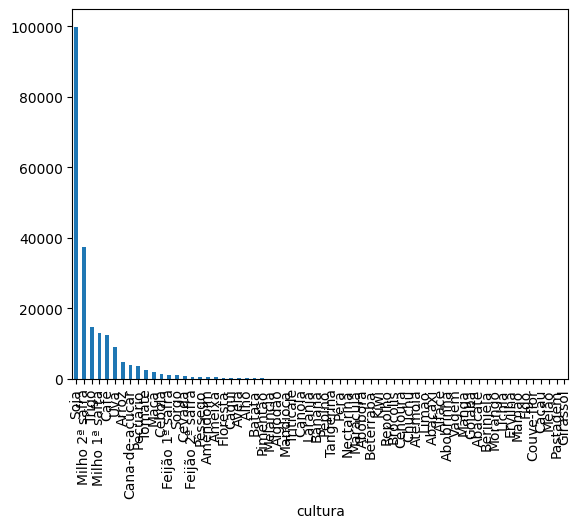

In [ ]:
# gráfico de colunas básico
df['cultura'].value_counts().plot(kind='bar');

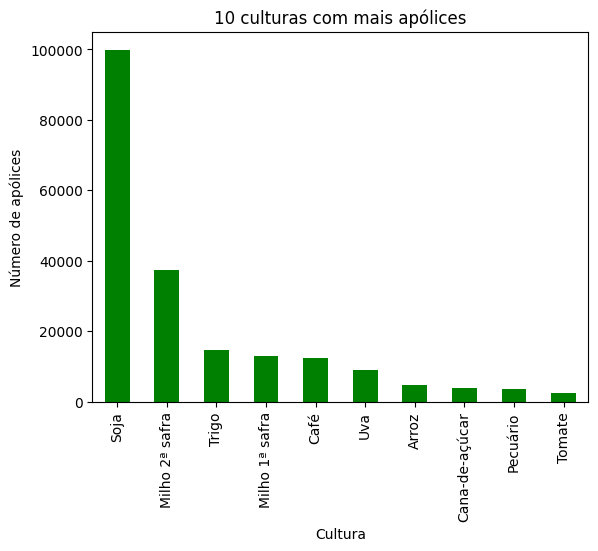

In [ ]:
# gráfico de colunas com mais elementos
ax = df['cultura'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='10 culturas com mais apólices', color='green')
ax.set_xlabel('Cultura')
ax.set_ylabel('Número de apólices');

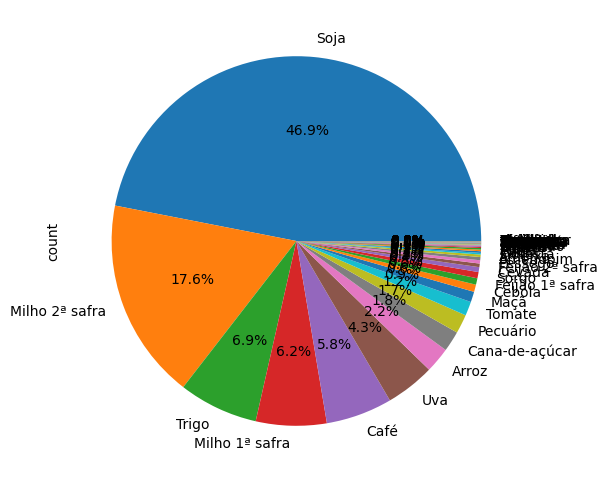

In [ ]:
# gráfico de pizza
plt.figure(figsize=(10,6))
df['cultura'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('');

São muitas as culturas agrícolas, vamos classificá-las em categorias menores e incluir essa informação numa nova coluna 'tipo_cultura':

In [ ]:
df['cultura'].unique()

array(['Milho 2ª safra', 'Uva', 'Tomate', 'Feijão 1ª safra', 'Sorgo',
       'Café', 'Trigo', 'Feijão 2ª safra', 'Milho 1ª safra', 'Repolho',
       'Tangerina', 'Atemoia', 'Pecuário', 'Floresta', 'Pepino',
       'Cana-de-açúcar', 'Pimentão', 'Soja', 'Abobrinha', 'Alho',
       'Berinjela', 'Beterraba', 'Canola', 'Melancia', 'Abóbora',
       'Batata', 'Aveia', 'Cebola', 'Abacate', 'Couve-flor', 'Laranja',
       'Triticale', 'Cenoura', 'Goiaba', 'Cevada', 'Banana', 'Ervilha',
       'Pêssego', 'Ameixa', 'Amendoim', 'Mandioca', 'Maracujá',
       'Brócolis', 'Alface', 'Caqui', 'Nectarina', 'Mamão', 'Kiwi',
       'Vagem', 'Maçã', 'Arroz', 'Abacaxi', 'Lichia', 'Manga', 'Morango',
       'Chuchu', 'Pêra', 'Limão', 'Algodão', 'Girassol', 'Figo', 'Cacau',
       'Melão', 'Pastagem'], dtype=object)

In [ ]:
df['tipo_cultura'] = df['cultura'].replace({'Soja': 'grãos',
                                            'Milho 1ª safra': 'grãos',
                                            'Milho 2ª safra': 'grãos',
                                            'Cana-de-açúcar': 'perenes',
                                            'Trigo': 'grãos',
                                            'Feijão 1ª safra': 'leguminosas',
                                            'Sorgo': 'grãos',
                                            'Café': 'perenes',
                                            'Cevada': 'sementes',
                                            'Batata': 'hortaliças',
                                            'Arroz': 'grãos',
                                            'Aveia': 'grãos',
                                            'Canola': 'grãos',
                                            'Algodão': 'grãos',
                                            'Mandioca': 'hortaliças',
                                            'Feijão 2ª safra': 'leguminosas',
                                            'Amendoim': 'leguminosas',
                                            'Triticale': 'grãos',
                                            'Pecuário': 'perenes',
                                            'Cebola': 'hortaliças',
                                            'Alho': 'hortaliças',
                                            'Melancia': 'frutas',
                                            'Tomate': 'hortaliças',
                                            'Girassol': 'grãos',
                                            'Abóbora': 'hortaliças',
                                            'Atemoia': 'frutas',
                                            'Cenoura': 'hortaliças',
                                            'Couve-flor': 'hortaliças',
                                            'Goiaba': 'frutas',
                                            'Laranja': 'frutas',
                                            'Tangerina': 'frutas',
                                            'Melão': 'frutas',
                                            'Pepino': 'hortaliças',
                                            'Pimentão': 'hortaliças',
                                            'Repolho': 'hortaliças',
                                            'Uva': 'frutas',
                                            'Beterraba': 'hortaliças',
                                            'Ameixa': 'frutas',
                                            'Chuchu': 'hortaliças',
                                            'Kiwi': 'frutas',
                                            'Maracujá': 'frutas',
                                            'Nectarina': 'frutas',
                                            'Pêssego': 'frutas',
                                            'Brócolis': 'hortaliças',
                                            'Pêra': 'frutas',
                                            'Pastagem': 'outros',
                                            'Caqui': 'frutas',
                                            'Maçã': 'frutas',
                                            'Floresta': 'outros',
                                            'Banana': 'frutas',
                                            'Abacate': 'frutas',
                                            'Abobrinha': 'hortaliças',
                                            'Alface': 'hortaliças',
                                            'Vagem': 'hortaliças',
                                            'Cacau': 'frutas',
                                            'Berinjela': 'hortaliças',
                                            'Figo': 'frutas',
                                            'Manga': 'frutas',
                                            'Ervilha': 'leguminosas',
                                            'Mamão': 'frutas',
                                            'Morango': 'frutas',
                                            'Lichia': 'frutas',
                                            'Abacaxi': 'frutas',
                                            'Limão': 'frutas',
                                            'Lima': 'frutas',
                                            'Graviola': 'frutas'})

In [ ]:
# reorganizar as colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'tipo_cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg', 'premio',
                'taxa', 'subvencao', 'indenizacao', 'evento', 'sinistro',
                'sinistralidade']]

In [ ]:
df['tipo_cultura'].unique()

array(['grãos', 'frutas', 'hortaliças', 'leguminosas', 'perenes',
       'outros', 'sementes'], dtype=object)

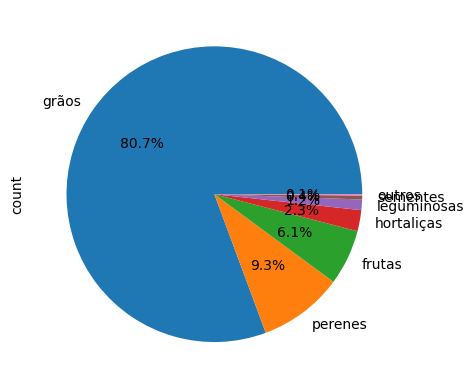

In [ ]:
df['tipo_cultura'].value_counts().plot(kind='pie', autopct='%1.1f%%');

Agora vamos fazer os mesmos gráficos que fizemos para as culturas:

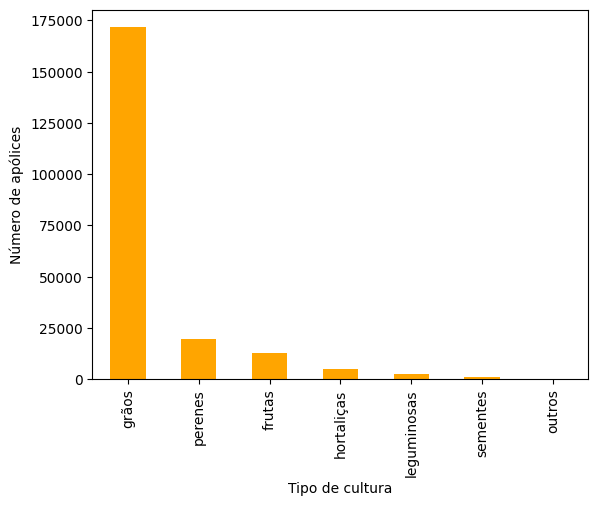

In [ ]:
# gráfico de colunas com mais elementos
ax = df['tipo_cultura'].value_counts().plot(kind='bar', color='orange')
ax.set_xlabel('Tipo de cultura')
ax.set_ylabel('Número de apólices');

Variáveis quantitativas:

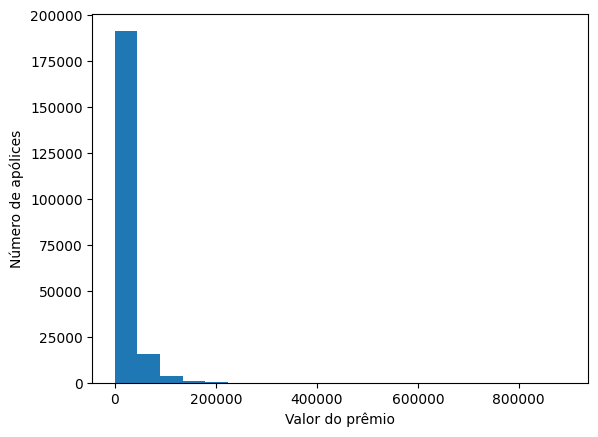

In [ ]:
# histograma com opções
ax = df['premio'].plot(kind='hist', bins=20)
ax.set_ylabel('Número de apólices')
ax.set_xlabel('Valor do prêmio');

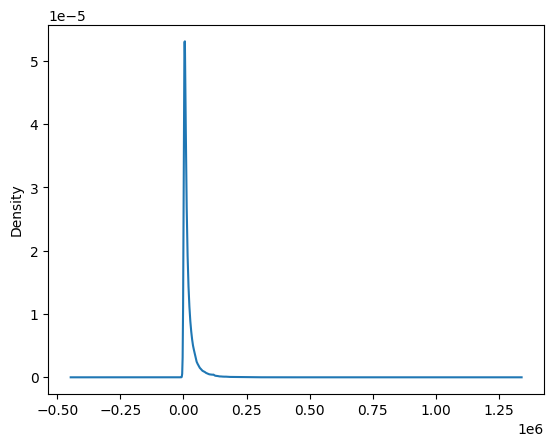

In [ ]:
ax = df['premio'].plot(kind='kde');

Boxplots são úteis para detectar *outliers* (valores discrepantes)

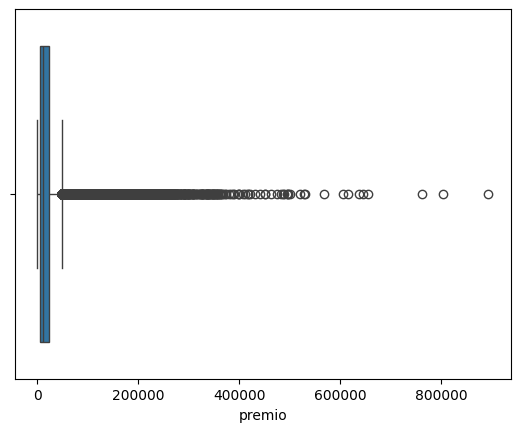

In [ ]:
# boxplot básico
sns.boxplot(x=df['premio']);

# Passo 4: Relação entre variáveis

- Diagramas de dispersão
- Mapas de calor (*heatmaps*)
- Agrupamento dos dados: *groupby* (depois)

In [ ]:
# correlação entre as variáveis numéricas
df.iloc[:, 5:].corr(numeric_only=True)

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
area,1.00,-0.00,0.01,-0.00,-0.00,0.00,0.04,0.12,-0.01,0.09,0.04,-0.01,-0.01
animal,-0.00,1.00,0.01,-0.00,-0.00,-0.07,0.06,0.02,-0.04,0.03,-0.01,-0.02,-0.01
duracao,0.01,0.01,1.00,-0.00,-0.00,-0.15,0.03,0.00,-0.28,-0.03,-0.09,-0.33,-0.16
prod_est,-0.00,-0.00,-0.00,1.00,1.00,0.03,-0.00,-0.00,0.00,0.00,-0.01,-0.02,-0.01
prod_seg,-0.00,-0.00,-0.00,1.00,1.00,0.03,-0.00,-0.00,0.00,0.00,-0.01,-0.02,-0.01
nivel_cob,0.00,-0.07,-0.15,0.03,0.03,1.00,-0.02,0.04,0.18,0.03,0.02,0.07,0.03
total_seg,0.04,0.06,0.03,-0.00,-0.00,-0.02,1.00,0.28,-0.08,0.22,0.10,-0.03,-0.02
premio,0.12,0.02,0.00,-0.00,-0.00,0.04,0.28,1.00,0.11,0.84,0.41,0.03,-0.03
taxa,-0.01,-0.04,-0.28,0.00,0.00,0.18,-0.08,0.11,1.00,0.23,0.04,0.26,-0.01
subvencao,0.09,0.03,-0.03,0.00,0.00,0.03,0.22,0.84,0.23,1.00,0.33,0.05,-0.05


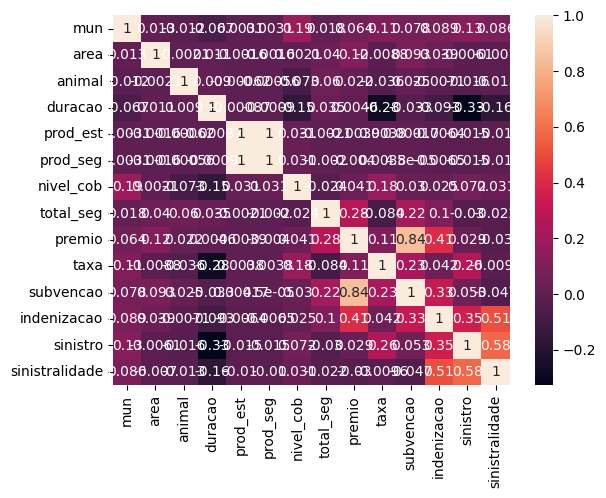

In [ ]:
# heatmap sem opções
sns.heatmap(df.corr(numeric_only=True), annot=True);

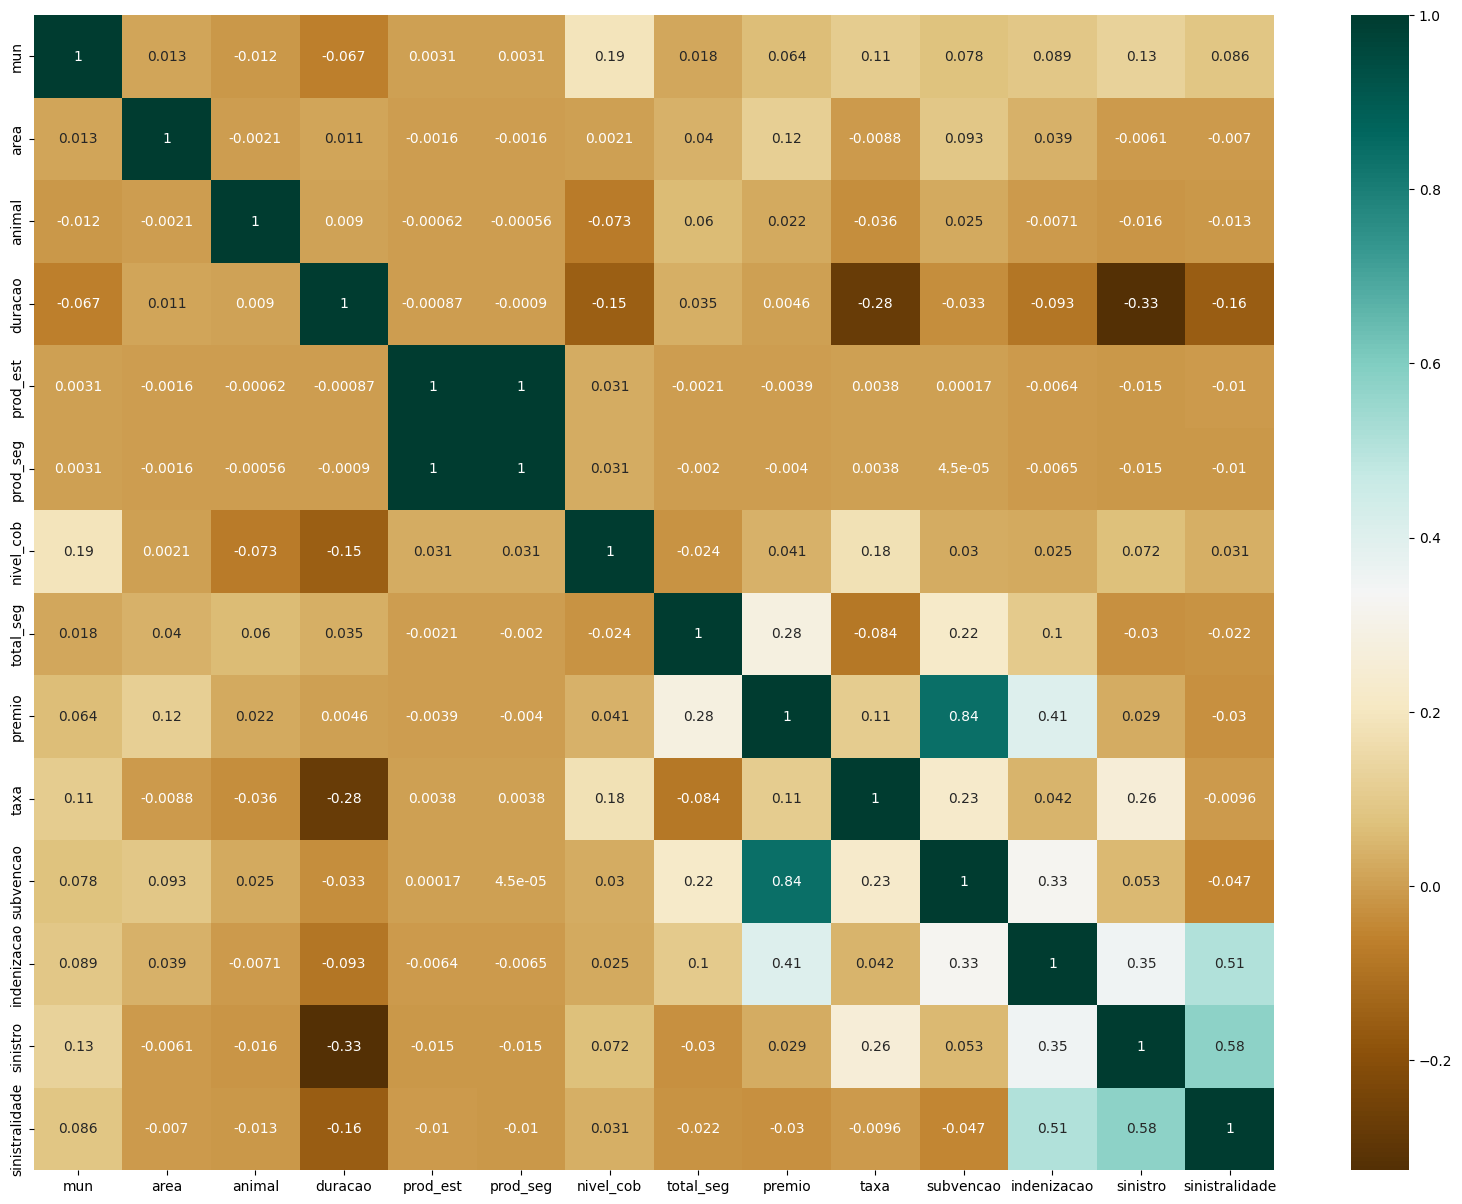

In [ ]:
# heatmap com opções
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),cmap="BrBG",annot=True);

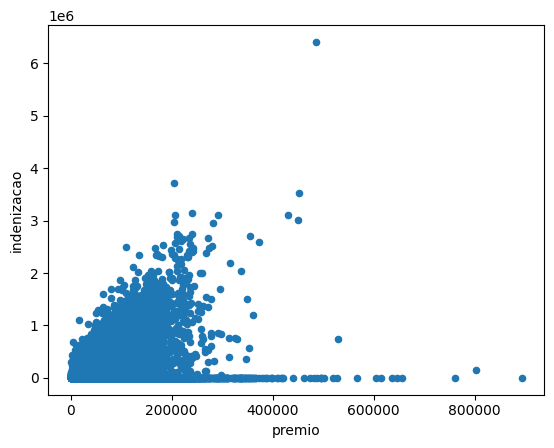

In [ ]:
# diagrama de dispersão
df.plot(kind='scatter',
        x='premio',
        y='indenizacao',
        title='')
plt.show()

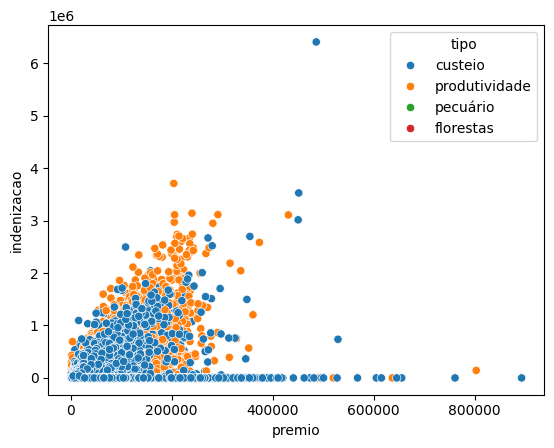

In [ ]:
ax = sns.scatterplot(x='premio',
                y='indenizacao',
                hue='tipo',
                data=df)
ax.set_title('')
plt.show()

In [ ]:
df_corr = df[['prod_seg', 'premio', 'subvencao', 'indenizacao']].dropna().corr()
df_corr

,prod_seg,premio,subvencao,indenizacao
prod_seg,1.00,-0.00,0.00,-0.01
premio,-0.00,1.00,0.84,0.41
subvencao,0.00,0.84,1.00,0.33
indenizacao,-0.01,0.41,0.33,1.00
